In [1]:
from helper_funcs_ConnectomeCompare import get_Caronlike, alignConnectomes, shufmat, shufmat_indegree_only, jsanalysis

In [2]:
from scipy.spatial import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Get all the weight matrices
W_Neuprint, W_Neuprint_thr, W_OGCaron, W_Caron2013, W_Mel_Male, W_Mel_Female, W_Sec_Female, W_Sim_Female, W_FAFB_thr, cin_val, c, OGCaron = alignConnectomes()

loading from file
processing connections
generating weight matrices
done
found 110 of 134 uPN IDs upstream of KCs
there are 50 neuprint glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 caron glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 fafb glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 

In [4]:
W_Tatsuya_Orca, Tatsuya_Orca = get_Caronlike('Tatsuya_D_Mel_Orca.csv')
W_Tatsuya_Control, Tatsuya_Control = get_Caronlike('Tatsuya_D_Mel_Control.csv')

In [5]:
W_Neuprint_shuff = shufmat_indegree_only(W_Neuprint_thr, W_Tatsuya_Control)
W_FAFB_shuff = shufmat_indegree_only(W_FAFB_thr, W_Tatsuya_Control)
W_Caron2013_shuff = shufmat_indegree_only(W_Caron2013, W_Tatsuya_Control)
W_Tatsuya_Orca_shuff = shufmat_indegree_only(W_Tatsuya_Orca, W_Tatsuya_Control)
W_Tatsuya_Control_shuff = shufmat_indegree_only(W_Tatsuya_Control, W_Tatsuya_Control)

In [6]:
W_Neuprint_shuff_strong = shufmat(W_Neuprint_thr, W_Tatsuya_Control)
W_FAFB_shuff_strong = shufmat(W_FAFB_thr, W_Tatsuya_Control)
W_Caron2013_shuff_strong = shufmat(W_Caron2013, W_Tatsuya_Control)
W_Tatsuya_Orca_shuff_strong = shufmat(W_Tatsuya_Orca, W_Tatsuya_Control)
W_Tatsuya_Control_shuff_strong = shufmat(W_Tatsuya_Control, W_Tatsuya_Control)

In [7]:
weights_raw = [W_Tatsuya_Control, W_Tatsuya_Orca, W_Caron2013, W_FAFB_thr, W_Neuprint_thr, W_Tatsuya_Control_shuff, W_Tatsuya_Orca_shuff, W_Caron2013_shuff, W_FAFB_shuff, W_Neuprint_shuff, W_Tatsuya_Control_shuff_strong, W_Tatsuya_Orca_shuff_strong, W_Caron2013_shuff_strong, W_FAFB_shuff_strong, W_Neuprint_shuff_strong] 

In [8]:
weights = []
for mat in weights_raw:
    W = pd.DataFrame(mat, columns = W_Tatsuya_Control.columns)
    weights.append(W)

In [9]:
labels = ['Orca +/+', 'Orca -/-', 'Caron 2013', 'FAFB', 'Neuprint', 'Orca +/+ shuff', 'Orca -/- shuff', 'Caron 2013 shuff', 'FAFB shuff', 'Neuprint shuff','Orca +/+ shuff (conn probs)', 'Orca -/- shuff (conn probs)', 'Caron 2013 shuff (conn probs)', 'FAFB shuff (conn probs)', 'Neuprint shuff (conn probs)']

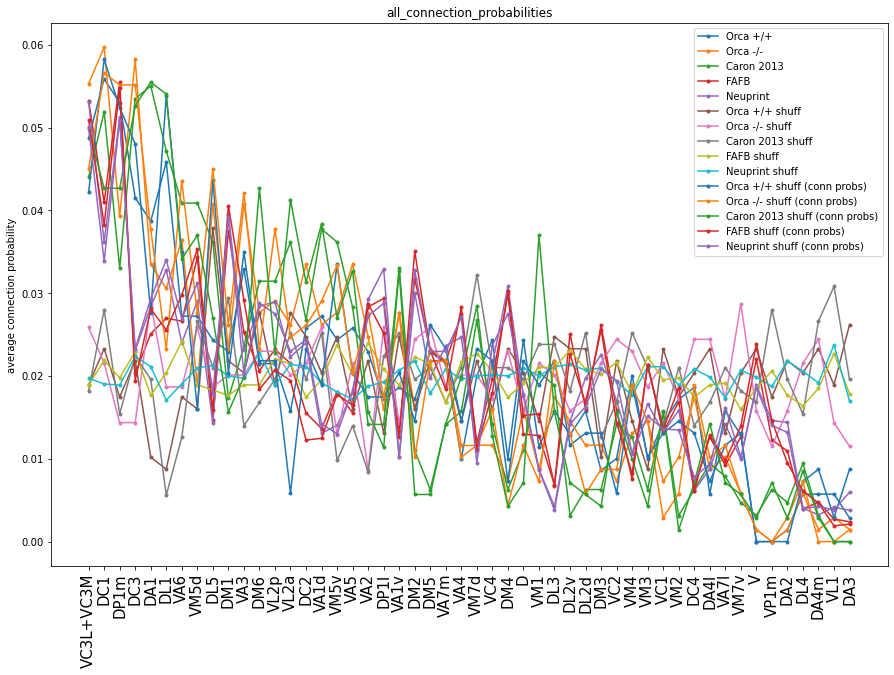

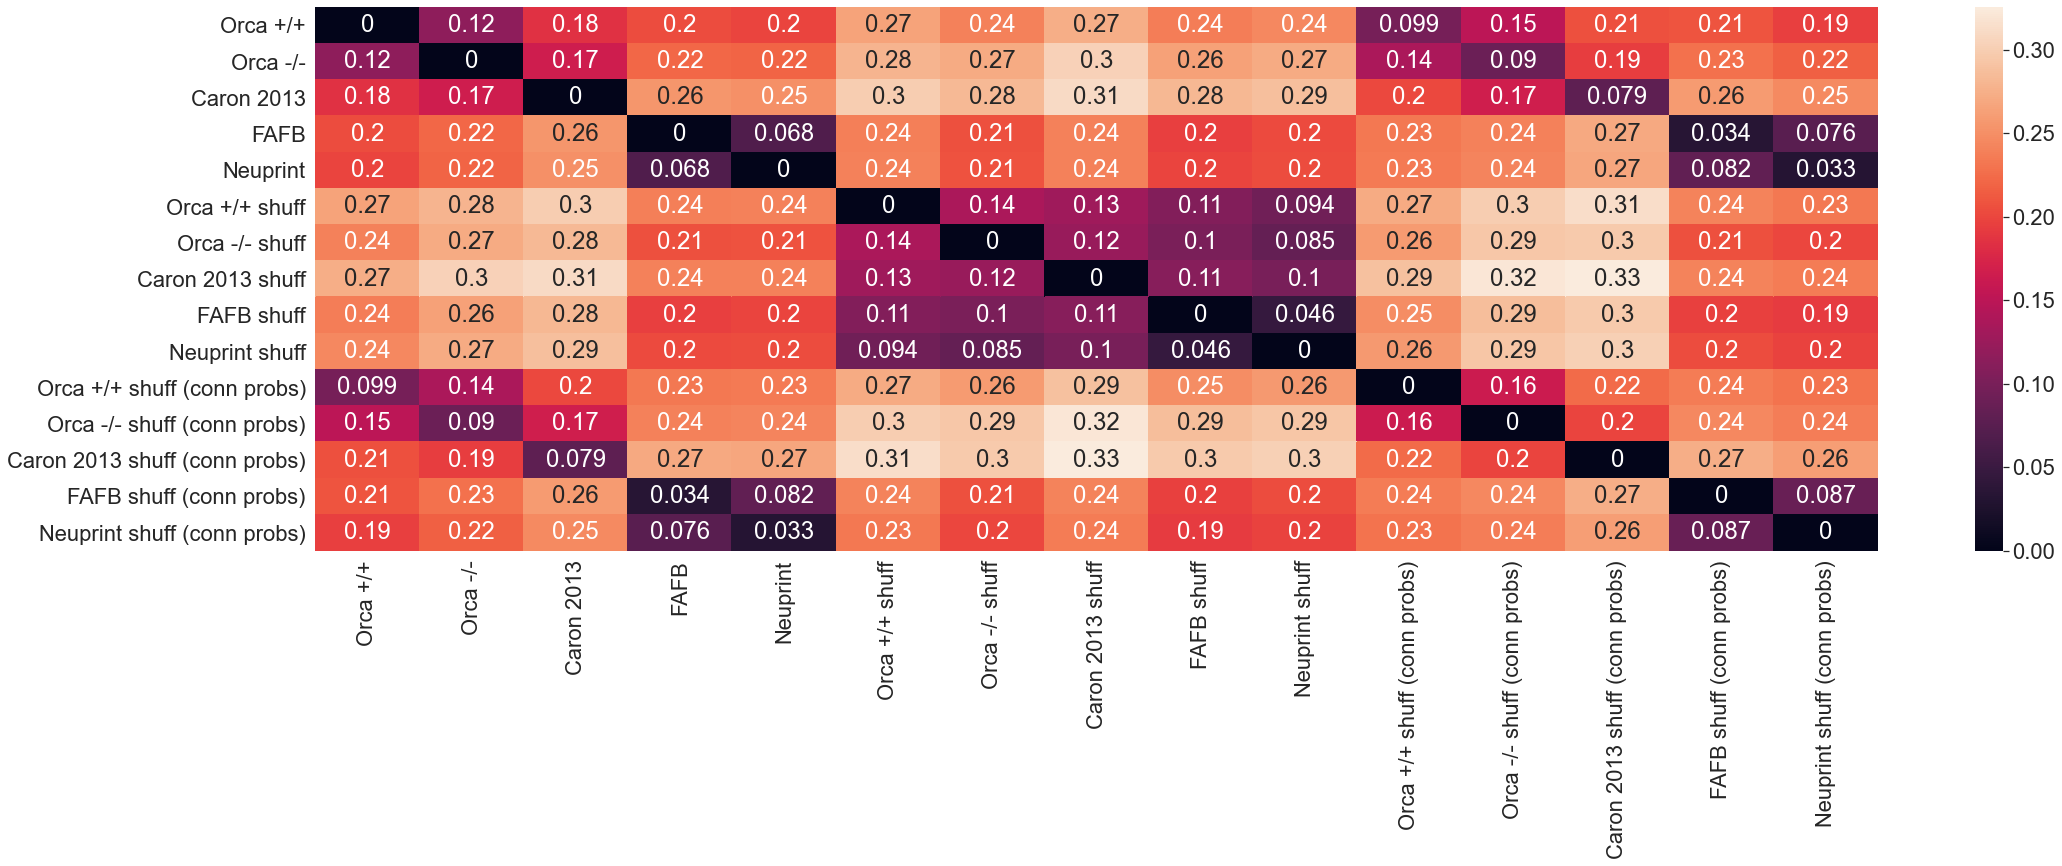

In [10]:
jsanalysis(weights, labels, 'Jensen-shannon distances')